In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, f1_score
from sklearn.utils import shuffle
from scipy.sparse import csr_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB

In [24]:
# Read the pickle file
features = pd.read_pickle('./Datasets/feature_extraction.pkl')
features.head()

,sentence,emotion,doc_2_grams,doc_3_grams,token_part_of_speech,token_lemmatized,token_normalized,token_dependancy,token_sentiment
0,That game hurt.,other,[game_hurt],[],"[DET, NOUN, VERB, PUNCT]","[that, game, hurt, .]","[that, game, hurt, .]","[det, nsubj, ROOT, punct]","[0.0, -0.4, 0.0, 0.0]"
1,"You do right, if you don't care then fuck 'em!",other,"[right_care, care_fuck]",[right_care_fuck],"[PRON, VERB, ADV, PUNCT, SCONJ, PRON, AUX, PAR...","[you, do, right, ,, if, you, do, not, care, th...","[you, do, right, ,, if, you, do, not, care, th...","[nsubj, ccomp, dobj, punct, mark, nsubj, aux, ...","[0.0, 0.0, 0.2857142857142857, 0.0, 0.0, 0.0, ..."
2,Man I love reddit.,happiness,"[man_love, love_reddit]",[man_love_reddit],"[INTJ, PRON, VERB, NOUN, PUNCT]","[man, I, love, reddit, .]","[man, i, love, reddit, .]","[intj, nsubj, ROOT, dobj, punct]","[0.0, 0.0, 0.5, 0.0, 0.0]"
3,"[NAME] was nowhere near them, he was by the Fa...",other,[near_falcon],[],"[X, NOUN, PUNCT, AUX, ADV, ADP, PRON, PUNCT, P...","[[, name, ], be, nowhere, near, they, ,, he, b...","[[, name, ], was, nowhere, near, them, ,, he, ...","[dep, dep, punct, ccomp, advmod, prep, pobj, p...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, ..."
4,Right? Considering it’s such an important docu...,happiness,"[right_consider, consider_important, important...","[right_consider_important, consider_important_...","[INTJ, PUNCT, VERB, PRON, VERB, DET, DET, ADJ,...","[right, ?, consider, it, ’, such, an, importan...","[right, ?, considering, it, 's, such, an, impo...","[ROOT, punct, csubj, nsubj, advcl, predet, det...","[0.2857142857142857, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [25]:
# Concatenate all specified columns into a single feature column
features['X'] = features['sentence'] + ' ' + \
                features['doc_2_grams'].map(lambda x: ' '.join(x)) + ' ' + \
                features['doc_3_grams'].map(lambda x: ' '.join(x)) + ' ' + \
                features['token_part_of_speech'].map(lambda x: ' '.join(x)) + ' ' + \
                features['token_lemmatized'].map(lambda x: ' '.join(x)) + ' ' + \
                features['token_normalized'].map(lambda x: ' '.join(x)) + ' ' + \
                features['token_dependancy'].map(lambda x: ' '.join(x)) + ' ' + \
                features['token_sentiment'].map(lambda x: ' '.join(map(str, x)))

# Define features and target
X = features['X']
y = features['emotion']

# Drop rows with NaN values in 'X_text' and corresponding 'y'
X.dropna(inplace=True)
y = y[X.index]

In [26]:
# Vectorize the text data
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

In [34]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Split the training data into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [28]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [29]:
# Predict on the test data
y_pred = model.predict(X_test)

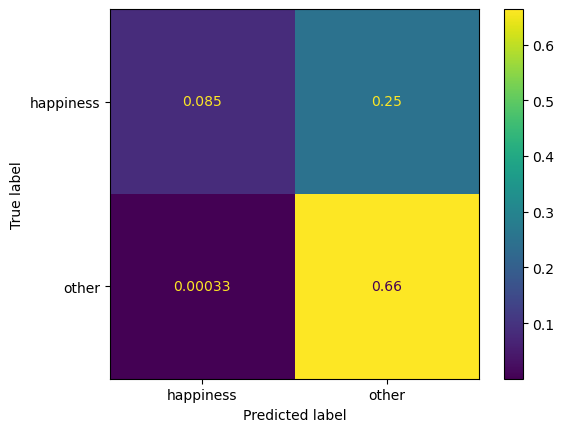

In [30]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='all')

In [31]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 score:", f1)

Accuracy: 0.7489006511011401
F1 score: 0.6942025579324246


In [32]:
# Loading kaggle test file
file_path = "C:/Users/neilr/Documents/BUAS year 2/Block C/2023-24c-fai2-adsai-neildaniel221270/Kaggle/Datasets/test (1).csv"
test_kaggle = pd.read_csv(file_path, sep='\t')
test_kaggle.head()

,id,sentence
0,0,I get sad when I see a sick animal.
1,1,Getting punched in the face like that makes my...
2,2,I get anxious near the end of the block.
3,3,being awoken to a shadowy figure at the edge o...
4,4,I am annoyed that my brother didn't wash his d...


In [39]:
# Preprocess the text data
X_test_kaggle = test_kaggle['sentence']

# Fit the CountVectorizer on the training data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

# Vectorize the test data using the fitted CountVectorizer
X_test_vectorized = vectorizer.transform(X_test_kaggle)

In [40]:
# Predict emotions
y_pred_kaggle = model.predict(X_test_vectorized)

In [41]:
# Create DataFrame with predictions
predictions = pd.DataFrame({'id': test_kaggle['id'], 'emotion': y_pred_kaggle})
predictions

,id,emotion
0,0,other
1,1,other
2,2,other
3,3,other
4,4,other
...,...,...
1431,1431,other
1432,1432,other
1433,1433,other
1434,1434,other


In [42]:
# Count occurrences of each emotion
emotion_counts = predictions['emotion'].value_counts()
emotion_counts

emotion
other        1421
happiness      15
Name: count, dtype: int64

In [ ]:
# Save predictions to CSV
predictions.to_csv('./Kaggle/Datasets/predictions_NB_4.csv', index=False)
print("DataFrame has been saved as predictions_NB_4.csv")